### Titanic Prediction

In [1]:
# Importing basic library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,VotingClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score

In [2]:
# disallowing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting pandas to display all rows
pd.set_option('display.max_rows',None)

In [4]:
# Loading dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submit=pd.read_csv('gender_submission.csv')

In [5]:
print('Train shape: ',train.shape)
print('Test shape: ',test.shape)
print('Submission shape: ',submit.shape)

Train shape:  (891, 12)
Test shape:  (418, 11)
Submission shape:  (418, 2)


In [6]:
# printing top 5 rows of all dataset we loaded
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
# Getting null values in train
train_null=train.isnull().sum()
train_null[train_null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [10]:
# Getting null values in test
test_null=test.isnull().sum()
test_null[test_null>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [11]:
# Percentage of missing values in train
null=pd.DataFrame(train_null[train_null>0])
null.columns=['missing']
null['missing%']=((null['missing']/train.shape[0])*100).round(2)
null

,missing,missing%
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


In [12]:
# Percentage of missing values in test
null=pd.DataFrame(test_null[test_null>0])
null.columns=['missing']
null['missing%']=((null['missing']/test.shape[0])*100).round(2)
null

,missing,missing%
Age,86,20.57
Fare,1,0.24
Cabin,327,78.23


> Cabin Column has more than 75 percent missing values in both train and test data, it is better to drop it.

In [13]:
train.drop('Cabin',axis='columns',inplace=True)
test.drop('Cabin',axis='columns',inplace=True)

In [14]:
# lets deal with age column

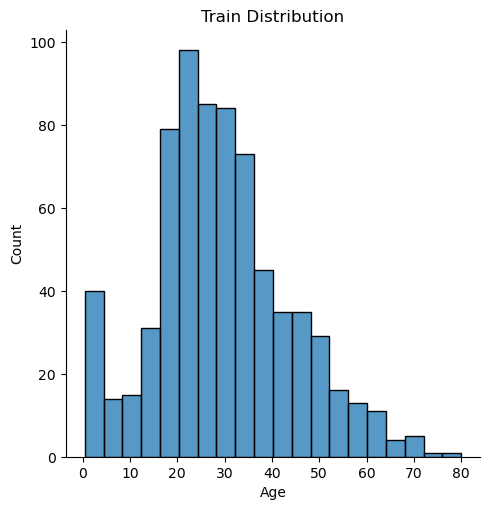

In [16]:
# plt.figure(figsize=(3,2))
sns.displot(train['Age'])
plt.title('Train Distribution')
plt.ylabel('Count')
plt.show()

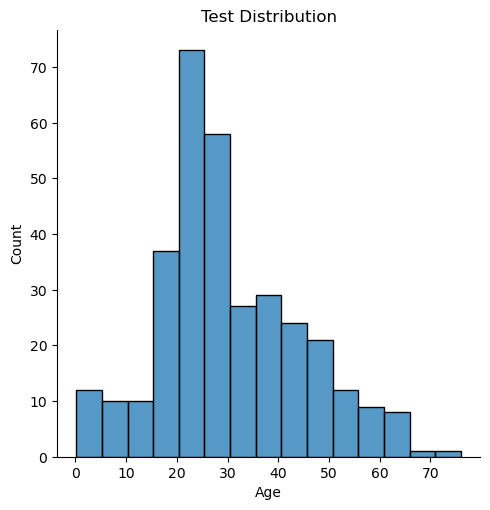

In [20]:
sns.displot(test['Age'])
plt.title('Test Distribution')
plt.ylabel('Count')
plt.show()

In [21]:
train['Age'].describe()
# print(train['Age'].value_counts())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

> Distribution of age is similar to normal distribution, although not like a perfect normal distribution.
Mean value is 29, 25% peoples are of age 20 or less, this means 75% peoples are older than 20 years, mean is a good option to fill Null values

In [22]:
# Filling missing ages of train dataset
mean=train['Age'].mean()
train['Age'].fillna(mean,inplace=True)

In [23]:
# Filling missing ages of test dataset
mean=test['Age'].mean()
test['Age'].fillna(mean,inplace=True)

In [24]:
# Train['Embarked'] has 2 missing value lets do it  
train['Embarked'].value_counts(ascending=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
import numpy as np

In [27]:
cat_train=train.select_dtypes(include='object')
cat_train[cat_train['Embarked'].isna()]

,Name,Sex,Ticket,Embarked
61,"Icard, Miss. Amelie",female,113572,NaN
829,"Stone, Mrs. George Nelson (Martha Evelyn)",female,113572,NaN


In [28]:
# filling with the most frequent value
train['Embarked'].fillna('S',inplace=True)

In [29]:
train.isnull().sum().sum()

0

> Train data has no missing value.

In [31]:
test.isnull().sum()[test.isnull().sum()>0]

Fare    1
dtype: int64

> Test data has just one missing value in fare column

In [32]:
test.Fare.fillna(test.Fare.mean(),inplace=True)

In [33]:
test.isnull().sum().sum()

0

#### Now we have imputed all missing values, now we will perform data preprocessing

In [34]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [35]:
x=train.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
y=train['Survived']

In [36]:
ID=test['PassengerId']

In [37]:
test=test.drop(['PassengerId','Name','Ticket'],axis=1)

In [38]:
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C


In [39]:
y[0:3]

0    0
1    1
2    1
Name: Survived, dtype: int64

In [40]:
x=pd.get_dummies(x,drop_first=True)

In [41]:
test=pd.get_dummies(test,drop_first=True)

In [42]:
x.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0


In [43]:
test.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1


In [44]:
# Scaling train and test data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [45]:
x=ss.fit_transform(x)

In [46]:
test=ss.fit_transform(test)

### Model Development

#### Logistic regression

In [103]:
lr=LogisticRegression(C=1,penalty='l2')

In [104]:
lr.fit(x,y)

LogisticRegression(C=1)

In [105]:
ypred_lr=lr.predict(test)

In [106]:
ytrue=submit['Survived']

In [107]:
accuracy_score(ytrue,ypred_lr)

0.937799043062201

#### SVM

In [92]:
svm=SVC( C=1.0,kernel='poly',degree=2)

In [93]:
svm.fit(x,y)

SVC(degree=2, kernel='poly')

In [94]:
ypred_svm=svm.predict(test)
accuracy_score(ytrue,ypred_svm)

0.9234449760765551

#### Decision Tree

In [74]:
dt=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.0)

In [75]:
dt.fit(x,y)
ypred_dt=dt.predict(test)
accuracy_score(ytrue,ypred_dt)

0.7559808612440191

#### Random Forest

In [76]:
rf=RandomForestClassifier(n_estimators=400,criterion='gini',max_depth=None)

In [77]:
rf.fit(x,y)
ypred_rf=dt.predict(test)
accuracy_score(ytrue,ypred_rf)

0.7559808612440191

#### AdaBoostClassifier

In [98]:
adb=AdaBoostClassifier()

In [99]:
adb.fit(x,y)
ypred_adb=dt.predict(test)
accuracy_score(ytrue,ypred_adb)

0.7559808612440191

> From above 4 models, SVM has produced the maximum accuracy.

In [100]:
mysub=pd.DataFrame()
mysub['PassengerID']=ID
mysub['Survived']=ypred_lr

In [101]:
mysub.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [102]:
mysub.to_csv('submission03.csv',index=False)